In [1]:
import boto3
import csv
import json
import io
from PIL import Image, ImageDraw, ExifTags, ImageColor

In [2]:
def show_faces(photo):
    client = boto3.client('rekognition',
                      aws_access_key_id = access_key_id,
                      aws_secret_access_key = secret_access_key,
                      region_name='ap-south-1')
    
    with open(photo, 'rb') as source_image:
        source_bytes = source_image.read()
    stream = io.BytesIO(source_bytes)
    image = Image.open(photo,'r')      
#     image=Image.open(im)

    #Upload through imageBytes.

    #response is not limited.
    response = client.detect_faces(Image = {'Bytes': source_bytes,},Attributes=['ALL'])

    imgWidth, imgHeight = image.size  
    draw = ImageDraw.Draw(image)  
                    

    # calculate and display bounding boxes for each detected face       
    print('Detected faces for ' + photo)    
    for faceDetail in response['FaceDetails']:
        print('The detected face is between ' + str(faceDetail['AgeRange']['Low']) + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old')
        box = faceDetail['BoundingBox']
        left = imgWidth * box['Left']
        top = imgHeight * box['Top']
        width = imgWidth * box['Width']
        height = imgHeight * box['Height']
        print('Left: ' + '{0:.0f}'.format(left))
        print('Top: ' + '{0:.0f}'.format(top))
        print('Face Width: ' + "{0:.0f}".format(width))
        print('Face Height: ' + "{0:.0f}".format(height))

        points = (
            (left,top),
            (left + width, top),
            (left + width, top + height),
            (left , top + height),
            (left, top)

        )
        draw.line(points, fill='#00d400', width=2)

        # Alternatively can draw rectangle. However you can't set line width.
        #draw.rectangle([left,top, left + width, top + height], outline='#00d400') 

    image.show()
    
    
    from IPython.display import display


#     path="/path/to/image.jpg"
    display(image)

    return len(response['FaceDetails'])

In [3]:
#Using Credentials
with open('credentials.csv','r') as input:
    next(input)
    reader = csv.reader(input)
    for line in reader:
        access_key_id = line[2]
        secret_access_key = line[3]

In [4]:
#initializing client
client = boto3.client('rekognition',
                      aws_access_key_id = access_key_id,
                      aws_secret_access_key = secret_access_key,
                      region_name='ap-south-1')

In [5]:
#Do this for each photo that is taken from the user's app that is updated to the server.
#images should be in jpg or png format
#attribute ALL provides all additional features of face
def facial_analysis(photo):
    with open(photo, 'rb') as source_image:
        source_bytes = source_image.read()

    #Upload through imageBytes.

    #response is not limited.
    response = client.detect_faces(Image = {'Bytes': source_bytes,},Attributes=['ALL'])
    print(json.dumps(response, indent=2))
    

In [6]:
facial_analysis('granny_smiling.jpg')


{
  "FaceDetails": [
    {
      "BoundingBox": {
        "Width": 0.18991000950336456,
        "Height": 0.33581408858299255,
        "Left": 0.4085942506790161,
        "Top": 0.10489703714847565
      },
      "AgeRange": {
        "Low": 55,
        "High": 73
      },
      "Smile": {
        "Value": true,
        "Confidence": 99.90476989746094
      },
      "Eyeglasses": {
        "Value": true,
        "Confidence": 97.62420654296875
      },
      "Sunglasses": {
        "Value": false,
        "Confidence": 89.54064178466797
      },
      "Gender": {
        "Value": "Female",
        "Confidence": 94.75529479980469
      },
      "Beard": {
        "Value": false,
        "Confidence": 97.06581115722656
      },
      "Mustache": {
        "Value": false,
        "Confidence": 99.24470520019531
      },
      "EyesOpen": {
        "Value": true,
        "Confidence": 98.98602294921875
      },
      "MouthOpen": {
        "Value": true,
        "Confidence": 99.4846496582

Detected faces for granny_smiling.jpg
The detected face is between 55 and 73 years old
Left: 654
Top: 122
Face Width: 304
Face Height: 392


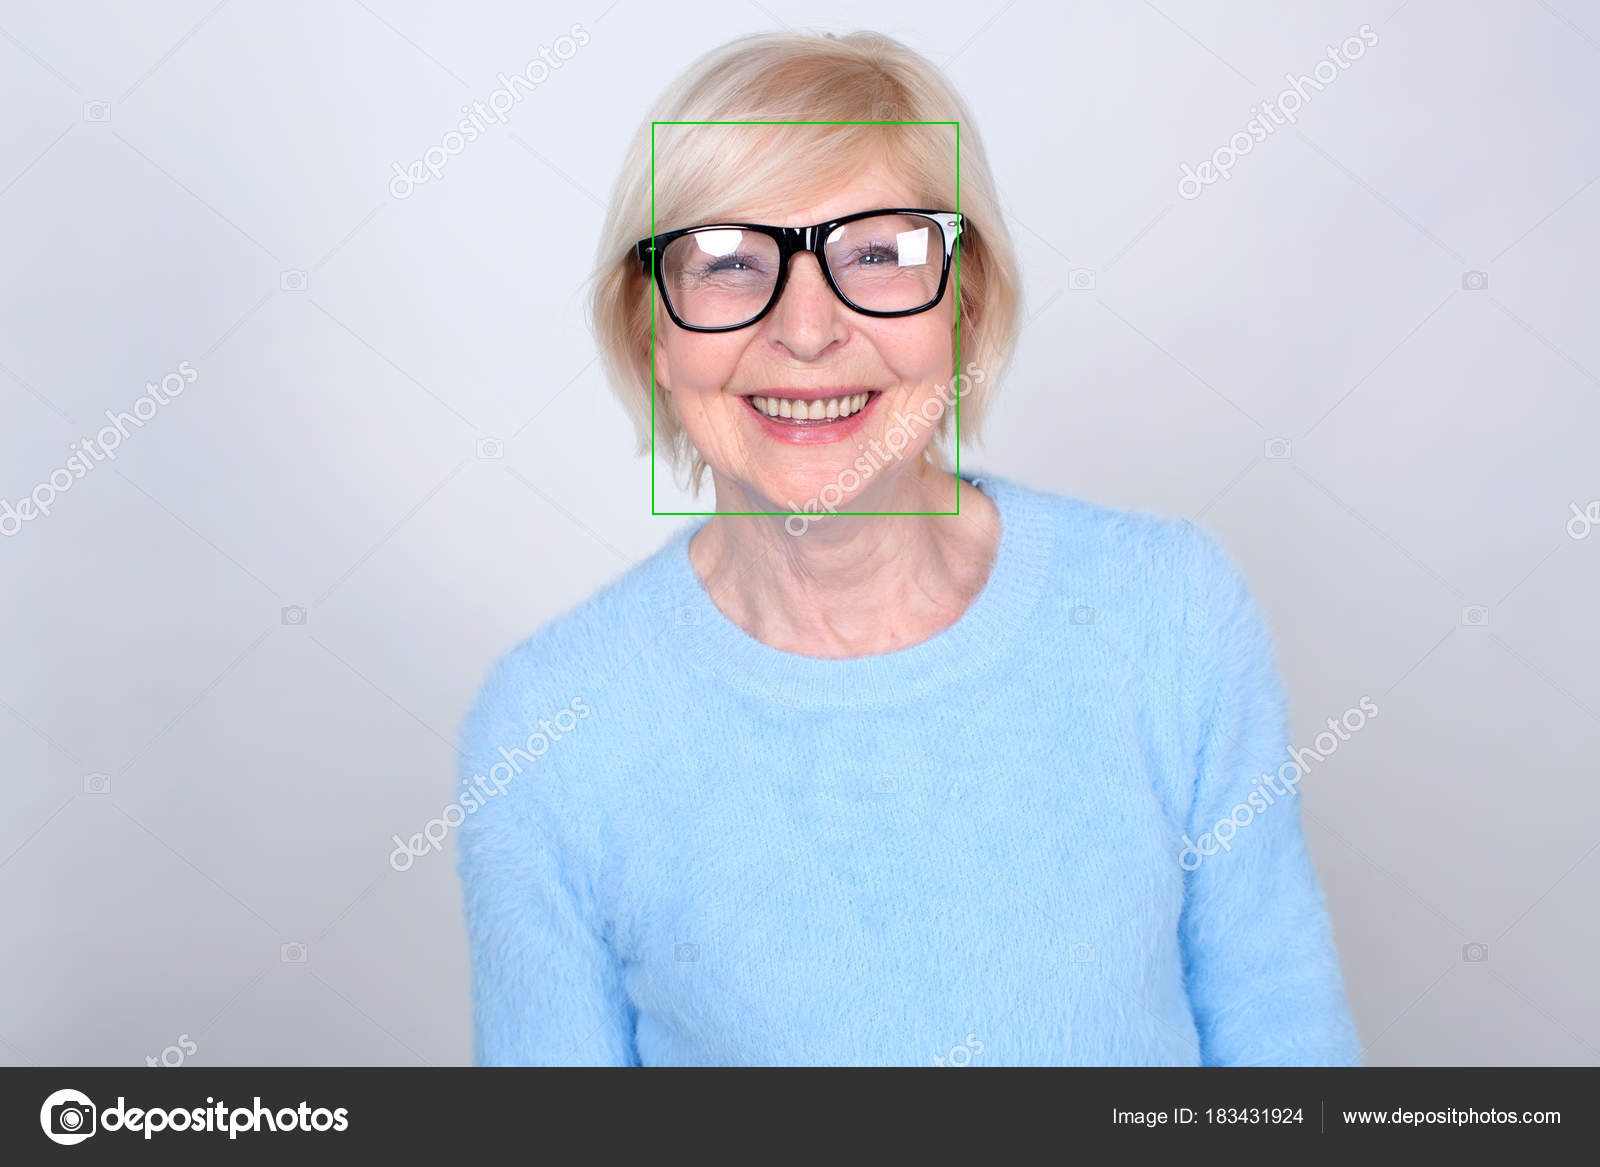

1

In [7]:
show_faces('granny_smiling.jpg')

In [8]:
# This photo has multiple candidates in it. Each of them have their own analysis
facial_analysis('oscar_selfie.jpg')

{
  "FaceDetails": [
    {
      "BoundingBox": {
        "Width": 0.18184420466423035,
        "Height": 0.4561997056007385,
        "Left": 0.5211604833602905,
        "Top": 0.43513768911361694
      },
      "AgeRange": {
        "Low": 24,
        "High": 38
      },
      "Smile": {
        "Value": true,
        "Confidence": 99.94652557373047
      },
      "Eyeglasses": {
        "Value": false,
        "Confidence": 99.77603912353516
      },
      "Sunglasses": {
        "Value": false,
        "Confidence": 99.93807983398438
      },
      "Gender": {
        "Value": "Male",
        "Confidence": 98.74469757080078
      },
      "Beard": {
        "Value": true,
        "Confidence": 93.32547760009766
      },
      "Mustache": {
        "Value": false,
        "Confidence": 81.430908203125
      },
      "EyesOpen": {
        "Value": true,
        "Confidence": 99.86482238769531
      },
      "MouthOpen": {
        "Value": true,
        "Confidence": 99.82591247558594


Detected faces for oscar_selfie.jpg
The detected face is between 24 and 38 years old
Left: 375
Top: 176
Face Width: 131
Face Height: 185
The detected face is between 26 and 40 years old
Left: 241
Top: 165
Face Width: 93
Face Height: 140
The detected face is between 13 and 25 years old
Left: 71
Top: 58
Face Width: 106
Face Height: 120
The detected face is between 22 and 34 years old
Left: 539
Top: 115
Face Width: 95
Face Height: 124
The detected face is between 23 and 37 years old
Left: -34
Top: 45
Face Width: 83
Face Height: 135
The detected face is between 27 and 43 years old
Left: 171
Top: 140
Face Width: 72
Face Height: 119
The detected face is between 37 and 55 years old
Left: 423
Top: -1
Face Width: 71
Face Height: 93
The detected face is between 28 and 44 years old
Left: 252
Top: 30
Face Width: 64
Face Height: 98
The detected face is between 22 and 34 years old
Left: 170
Top: 29
Face Width: 60
Face Height: 89
The detected face is between 27 and 43 years old
Left: 564
Top: 29
Face

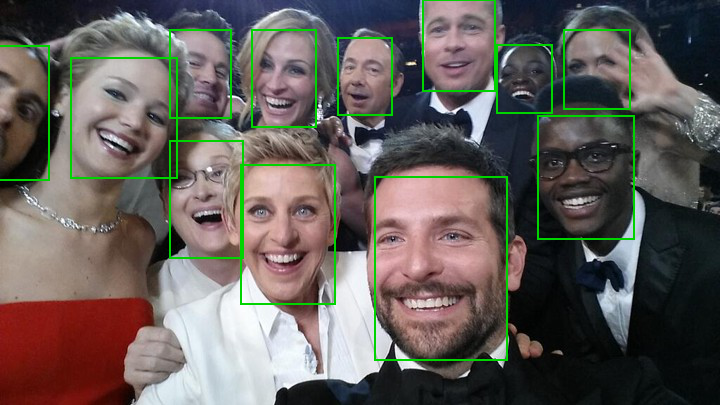

12

In [9]:
show_faces('oscar_selfie.jpg')